In [73]:
import sys,os
__script_path=os.path.abspath(globals().get('__file__','.'))
__script_dir = os.path.dirname(__script_path)
root_dir = os.path.abspath(f'{__script_dir}/../../..')
print(root_dir)
for lib in [root_dir][::-1]:
    if lib in sys.path:
        sys.path.remove(lib)
    sys.path.insert(0,lib)

from libs.common import *
from config.config import *

c:\Users\Admin\Data\ads_fraud_detection


# 3. Tiền xử lí dữ liệu

In [74]:
save_dir=f"{exps_dir}/exp1/exp_gan"

save_dir = f"{save_dir}"
os.makedirs(save_dir, exist_ok=True)
test_size=0.33
seed=42

In [75]:
test_size=0.33
seed=42
data=pd.read_excel(f'{exps_dir}/exp1/data_EDA.xlsx')
data

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,day_policy_bind_date,month_policy_bind_date,year_policy_bind_date,day_incident_date,month_incident_date,year_incident_date
0,Y,Middle,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,Morning,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2002-2008,Y,17,10,2014,25,1,2015
1,Y,Middle,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,Morning,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2002-2008,Y,27,6,2006,21,1,2015
2,Y,Young,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,Morning,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2002-2008,N,6,9,2000,22,2,2015
3,Y,Middle,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,Morning,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2018++,Y,25,5,1990,10,1,2015
4,Y,Middle,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,?,Minor Damage,NaN,NY,Arlington,Night,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2018++,N,6,6,2014,17,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,N,Middle,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,Night,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2002-2008,N,16,7,1991,22,2,2015
996,Y,Middle,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,Night,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2018++,N,5,1,2014,24,1,2015
997,Y,Young,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,Morning,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1995-20001,N,17,2,2003,23,1,2015
998,Y,Old,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,Morning,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1995-20001,N,18,11,2011,26,2,2015


In [76]:
data.isnull().sum()

months_as_customer              4
age                             2
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex                     0
insured_education_level         0
insured_occupation              0
insured_hobbies                 0
insured_relationship            0
capital-gains                   0
capital-loss                    0
incident_type                   0
collision_type                  0
incident_severity               0
authorities_contacted          91
incident_state                  0
incident_city                   0
incident_hour_of_the_day       52
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
witnesses                       0
police_report_available         0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim 

# 4.Chuẩn hóa dữ liệu

In [77]:
numeric_columns=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['numeric_columns']
numeric_columns

array(['policy_annual_premium', 'capital-gains', 'capital-loss',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim', 'day_policy_bind_date', 'month_policy_bind_date',
       'year_policy_bind_date', 'day_incident_date',
       'month_incident_date', 'year_incident_date'], dtype='<U22')

In [78]:
category_columns=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['category_columns']
category_columns

array(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage',
       'bodily_injuries', 'witnesses', 'police_report_available',
       'auto_make', 'auto_model', 'auto_year', 'fraud_reported'],
      dtype='<U27')

In [79]:
data_train, data_test = train_test_split(data, test_size = 0.33, random_state=seed)
print(data_train.shape,data_test.shape)
# data_train.to_excel(f'{save_dir}/datatrain.xlsx', index=None)
# data_test.to_excel(f'{save_dir}/datatest.xlsx', index=None)

(670, 40) (330, 40)


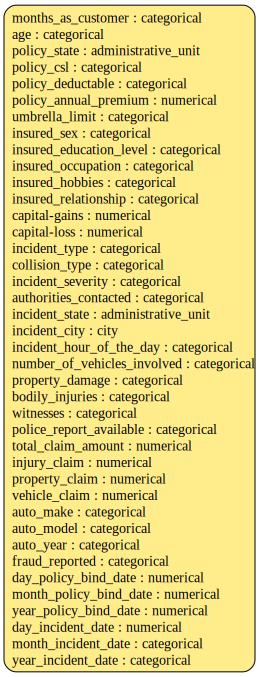

In [80]:
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data_train)
metadata.visualize()

In [81]:
from sdv.single_table import CopulaGANSynthesizer
model = CopulaGANSynthesizer(
    cuda=True, metadata=metadata, epochs=100)
#     anonymize_fields={
#    'address': 'address',
#    'city': 'incident_city',

#     }

model.fit(data)

In [82]:
new_data = model.sample(num_rows=800)

In [83]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 40/40 [00:00<00:00, 2954.10it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 397.45it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [84]:
from sdv.evaluation.single_table import evaluate_quality

quality_report=evaluate_quality(real_data=data_train,
    synthetic_data=new_data,
    metadata=metadata)


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 40/40 [00:00<00:00, 1296.05it/s]|
Column Shapes Score: 85.01%

(2/2) Evaluating Column Pair Trends: |██████████| 780/780 [00:02<00:00, 363.10it/s]|
Column Pair Trends Score: 76.25%

Overall Score (Average): 80.63%



In [85]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,months_as_customer,TVComplement,0.906998
1,age,TVComplement,0.958333
2,policy_csl,TVComplement,0.915093
3,policy_deductable,TVComplement,0.986325
4,policy_annual_premium,KSComplement,0.693396
5,umbrella_limit,TVComplement,0.945429
6,insured_sex,TVComplement,0.922873
7,insured_education_level,TVComplement,0.908433
8,insured_occupation,TVComplement,0.944347
9,insured_hobbies,TVComplement,0.862631


In [86]:
from sklearn.utils import shuffle
gan_data_fraud=new_data[new_data.fraud_reported=="Y"]
data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)

data_train=pd.concat([data_train, gan_data_fraud] , axis=0, ignore_index=True)
data_train = shuffle(data_train, random_state=42)
data_train.fraud_reported.value_counts()



fraud_reported
N    511
Y    509
Name: count, dtype: int64

In [87]:
data_train.fraud_reported.tail

<bound method NDFrame.tail of 523    N
602    N
526    Y
31     N
616    Y
      ..
106    N
270    N
860    Y
435    N
102    N
Name: fraud_reported, Length: 1020, dtype: object>

In [88]:
x_train=data_train.drop('fraud_reported',axis=1)
y_train=data_train['fraud_reported']

# x_test=data_test.drop('fraud_reported',axis=1)
# y_test=data_test['fraud_reported']

In [89]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
# np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict

{0: 0.9980430528375733, 1: 1.0019646365422397}

In [90]:
y_train.value_counts()

fraud_reported
N    511
Y    509
Name: count, dtype: int64

In [91]:
x_test=data_test.drop('fraud_reported',axis=1)
y_test=data_test['fraud_reported']

In [92]:
label_encoders = {}
for column in category_columns:
    if column=="fraud_reported":
        continue
    label_encoder = LabelEncoder()
    x_train[column] = label_encoder.fit_transform(x_train[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_train[numeric_columns] = scaler.fit_transform(x_train[numeric_columns])
x_train

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,day_policy_bind_date,month_policy_bind_date,year_policy_bind_date,day_incident_date,month_incident_date,year_incident_date
523,0,2,11,1,2,-0.135115,0,1,6,2,9,1,-0.940368,0.809323,3,0,3,3,27,52,1,0,1,2,1,2,-1.676803,-1.182425,-1.288254,-1.729038,11,19,2,-1.423969,-0.446155,0.986569,-1.174354,0.998447,0.0
602,1,1,12,0,1,0.495180,0,0,2,10,3,2,0.655758,0.809323,2,1,1,1,52,19,2,0,1,2,1,1,0.337853,-0.064942,-0.211904,0.310913,13,28,1,-0.862658,1.249789,-1.531699,1.432852,0.998447,0.0
526,1,2,12,2,0,0.341022,0,1,4,8,18,5,-0.940368,0.809323,2,1,0,1,49,106,0,0,1,1,1,1,0.774402,0.034155,-0.116454,0.822176,4,30,0,-0.413609,-1.576785,-1.657613,0.979425,-0.908699,0.0
31,1,0,11,2,0,0.005199,0,1,2,11,0,3,-0.940368,-0.503457,2,1,2,2,26,126,0,0,1,2,0,2,0.775198,1.195916,1.002544,0.260909,5,16,1,-0.189085,0.684474,-1.783526,-0.947640,-0.908699,0.0
616,0,2,36,0,2,-0.009186,5,0,3,4,16,5,-0.940368,-0.947582,0,2,0,1,49,52,0,1,2,1,0,1,0.237479,1.136879,-0.268768,-0.094220,5,14,2,1.831635,-0.163498,0.860655,0.185927,0.998447,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,2,12,1,0,0.623489,3,0,5,12,8,0,0.598539,0.809323,2,3,2,3,49,147,0,0,2,2,3,1,1.717204,2.102553,1.875808,1.028824,0,31,2,-1.199445,-1.859442,0.608828,0.525998,-0.908699,0.0
270,1,2,12,2,0,-1.738381,5,1,2,6,15,4,0.670816,0.809323,2,3,2,3,52,105,1,0,1,0,2,2,1.195815,1.600740,-0.045374,0.965044,11,21,2,0.035440,0.967132,-0.020739,-0.720927,-0.908699,0.0
860,1,0,4,2,0,1.655908,0,1,2,2,16,2,-0.940368,0.809323,0,3,0,0,8,36,0,2,1,2,1,2,-0.262800,-0.386482,1.519598,-1.525451,9,29,2,0.484489,1.249789,-0.020739,1.432852,0.998447,0.0
435,1,0,11,2,2,1.255443,0,1,5,11,8,2,0.198001,0.809323,2,1,1,1,43,52,1,0,1,0,3,0,0.650925,0.871213,0.689793,0.258868,5,14,1,1.494849,-1.294127,-1.783526,0.866068,-0.908699,0.0


In [93]:
x_train.to_excel(f'{save_dir}/x_train.xlsx', index=False)
y_train.to_excel(f'{save_dir}/y_train.xlsx', index=False)

In [94]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}
np.savez(f'{save_dir}/class_weights_dict.npz', class_weights_dict = class_weights_dict)
class_weights_dict


{0: 0.9980430528375733, 1: 1.0019646365422397}

In [95]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
print(f"+ X_train: {len(x_train)}")
for fold, (train_idx, valid_idx) in enumerate(kfold.split(x_train, y_train)):
    print(f'Fold {fold}: ')
    print(f'+ train_idx: {train_idx}')
    print(f'+ valid_idx: {valid_idx}')
    print(f'+ train / valid: {valid_idx}')
    pass

+ X_train: 1020
Fold 0: 
+ train_idx: [   0    1    2    4    5    6    7    8    9   11   12   13   14   15
   16   17   18   19   20   21   22   24   26   27   28   29   32   33
   34   35   36   37   38   40   41   42   43   45   46   47   48   49
   50   51   52   53   56   57   58   61   62   64   65   68   69   71
   73   74   75   77   78   79   80   81   82   83   84   85   87   89
   90   91   92   93   94   95   97   98   99  102  103  104  105  106
  108  111  112  113  114  115  116  117  118  119  121  122  123  124
  125  126  127  128  129  130  131  132  133  134  135  137  138  140
  141  142  143  144  145  146  147  148  149  150  151  152  153  154
  155  156  157  159  160  161  162  163  164  165  166  167  169  170
  171  172  173  175  176  177  178  179  180  181  182  183  185  186
  187  188  189  190  191  192  193  194  195  196  197  200  201  202
  203  204  205  206  207  211  212  214  216  217  219  220  221  222
  223  224  225  226  227  228  229  23

In [96]:
object_cols_test=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['category_columns']
numeric_cols_test=dict(np.load(f'{exps_dir}/exp1/columns_dtype.npz',allow_pickle=True))['numeric_columns']
# for column in outliers_list:
#     data_test = remove_outliers_iqr(data_test, column)
# data_test['collision_type'].replace('?',np.nan,inplace=True)
# data_test['collision_type'].fillna(method='ffill',inplace=True)
# data_test[['property_damage','police_report_available']].replace('?','Unknow',inplace=True)
# (data_test=='?').sum()
label_encoders = {}
for column in object_cols_test:
    if column=="fraud_reported":
        continue
    label_encoder = LabelEncoder()
    x_test[column] = label_encoder.fit_transform(x_test[column])
    label_encoders[column] = label_encoder  # Lưu trữ label encoder nếu cần sau này

scaler = StandardScaler()
x_test[numeric_cols_test] = scaler.fit_transform(x_test[numeric_cols_test])

x_test=data_test.drop('fraud_reported',axis=1)
y_test=data_test['fraud_reported']
data_test.to_excel(f'{save_dir}/df_test_minmax.xlsx', index=False)
x_test.to_excel(f'{save_dir}/x_test.xlsx', index=False)
y_test.to_excel(f'{save_dir}/y_test.xlsx', index=False)